### Assignment 3 - Juan Esteban Rincón Poveda

Using Pandas and Statsmodels write a Jupyter Notebook that: 

1. Uses the data from the Maddison Project to plot the evolution of total population across the world. 
2. Plots the evolution of the share of the world population by countries and WB regions.
3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.
4. Downloads mortality and life expectancy data (across regions and cohorts) from the [Human Mortality Database](https://www.mortality.org/) and plots its evolution.
5. Using this data analyze the convergence of life expectanty, mortality and fertility.

Submit your notebook as a ``pull request`` to the course's github repository.

### 1. Uses the data from the Maddison Project to plot the evolution of total population across the world.

In [2]:
import pandas as pd
import numpy as np
import os


pathout = './data/'
if not os.path.exists(pathout):
    os.mkdir(pathout)
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)
    
    
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

In [3]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)

In [4]:
pop = maddison_new_region
pop['year'] = pop.year.astype(int)
pop['population'] = pop['pop']
pop

,region,region_name,year,cgdppc,rgdpnapc,pop,population
0,af,Africa,1870,NaN,NaN,NaN,NaN
1,af,Africa,1871,NaN,NaN,NaN,NaN
2,af,Africa,1872,NaN,NaN,NaN,NaN
3,af,Africa,1873,NaN,NaN,NaN,NaN
4,af,Africa,1874,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1034,wd,World,2012,13821.0,13818.0,6992923.0,6992923.0
1035,wd,World,2013,14038.0,14090.0,7072213.0,7072213.0
1036,wd,World,2014,14261.0,14376.0,7152269.0,7152269.0
1037,wd,World,2015,14500.0,14616.0,7231375.0,7231375.0


In [5]:
pop['year'] = pop.year.astype(int)

In [6]:
popg = pop
popg = popg.pivot_table(index='year',columns='region_name',values='population')
popg

region_name,Africa,East Asia,Eastern Europe,Latin America,Western Asia,Western Europe,Western Offshoots,World
year,,,,,,,,
1870,NaN,736845.0,NaN,39023.0,NaN,191985.0,46088.0,1013941.0
1871,NaN,NaN,NaN,NaN,NaN,192273.0,46880.0,NaN
1872,NaN,NaN,NaN,NaN,NaN,193136.0,48048.0,NaN
1873,NaN,NaN,NaN,NaN,NaN,194416.0,49221.0,NaN
1874,NaN,NaN,NaN,NaN,NaN,195825.0,50413.0,NaN
...,...,...,...,...,...,...,...,...
2012,1068526.0,3819948.0,408122.0,595819.0,307583.0,416306.0,376619.0,6992923.0
2013,1095271.0,3855229.0,408609.0,601971.0,313218.0,418149.0,379766.0,7072213.0
2014,1122390.0,3890745.0,408749.0,608041.0,319086.0,420202.0,383056.0,7152269.0


Text(0.5, 1.0, 'Evolution of total population across the world')

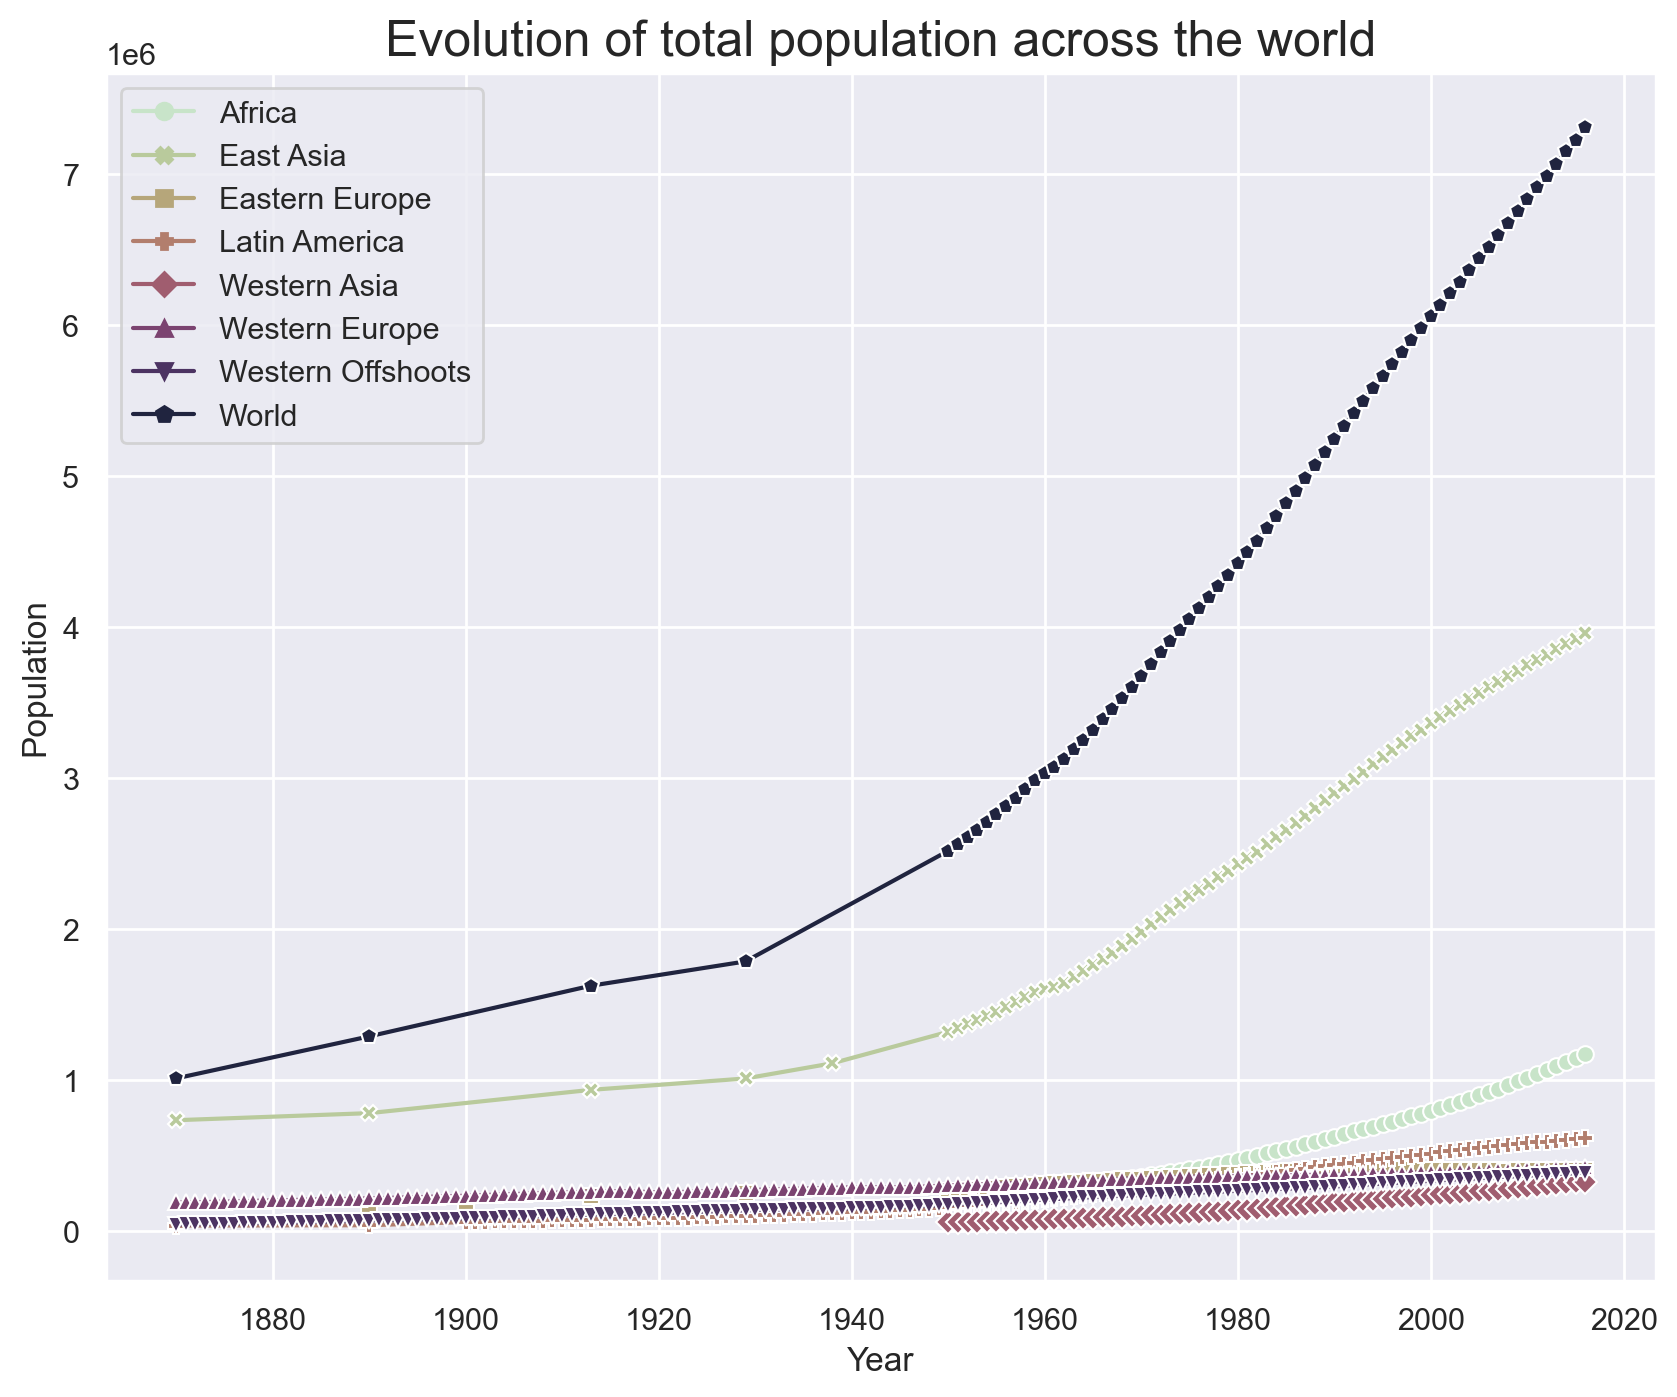

In [127]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=popg , alpha=1, style='choice',palette="ch:2.5,.95", dashes=False, markers=True)
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title("Evolution of total population across the world", fontsize=18)

### 2. Plots the evolution of the share of the world population by countries and WB regions.

In [8]:
import requests
import pandas as pd
import pandas_datareader as web


session = requests.Session()
session.verify = False

/Users/juanestebanrincon/opt/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [9]:
import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [10]:
import pandas as pd
import world_bank_data as wb
pd.set_option('display.max_rows', 6)
import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    import urllib3,certifi
https = urllib3.PoolManager( cert_reqs='CERT_REQUIRED',
 ca_certs=certifi.where(),)  

from time import sleep
from pandas_datareader import data, wb
import wbpy 
from pprint import pprint

In [11]:
import world_bank_data as wb
pd.set_option('display.max_rows', 6)

In [12]:
wbcountries = wb.get_countries()
wbcountries['name'] = wbcountries.name.str.strip()
wbcountries

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...
ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.7460
ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IDA,Lusaka,28.2937,-15.3982
ZWE,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312


In [13]:
wbcountries.reset_index(level=0, inplace=True)

In [14]:
wbcountries.rename(columns={'id':'countrycode'}, inplace=True)
wbcountries

,countrycode,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
1,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
2,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
301,ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.7460
302,ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IDA,Lusaka,28.2937,-15.3982
303,ZWE,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312


In [15]:
##### Maddison


In [26]:
popW = pop.loc[pop.region_name=='World']
popW = popW.pivot_table(index='year',columns='region_name',values='pop',aggfunc='sum')
popW

region_name,World
year,
1870,1013941.0
1890,1292040.0
1913,1627706.0
...,...
2014,7152269.0
2015,7231375.0
2016,7311687.0


In [27]:
popcountry=maddison_new.merge(popW, on='year')

In [28]:
popcountry['share']=(popcountry['pop']/popcountry['World'])*100
popcountry

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm,World,share
0,AFG,Afghanistan,1870.0,NaN,NaN,4207.0,NaN,NaN,1013941.0,0.414916
1,ALB,Albania,1870.0,658.0,795.0,603.0,Extrapolated,NaN,1013941.0,0.059471
2,ARG,Argentina,1870.0,2514.0,2578.0,1796.0,Extrapolated,NaN,1013941.0,0.177131
...,...,...,...,...,...,...,...,...,...,...
11615,VEN,Venezuela (Bolivarian Republic of),1929.0,1410.0,3319.0,3259.0,Extrapolated,NaN,1788473.0,0.182222
11616,YUG,Former Yugoslavia,1929.0,1054.0,2427.0,14194.0,Benchmark,Historical income benchmarks,1788473.0,0.793638
11617,ZAF,South Africa,1929.0,3117.0,3553.0,NaN,Extrapolated,NaN,1788473.0,NaN


In [29]:
popcountry2 = popcountry.pivot_table(index='year',columns='country',values='share',aggfunc='sum')

In [30]:
popregion = popcountry[['countrycode', 'country', 'year', 'pop',
                        'World']].merge(wbcountries[['countrycode', 'region']], on=['countrycode'])

In [31]:
popregion['share']=(popregion['pop']/popregion['World'])*100

In [32]:
popregion2 = popregion.pivot_table(index='year',columns='region',values='share',aggfunc='sum')

Text(0.5, 1.0, 'Share of world population by region')

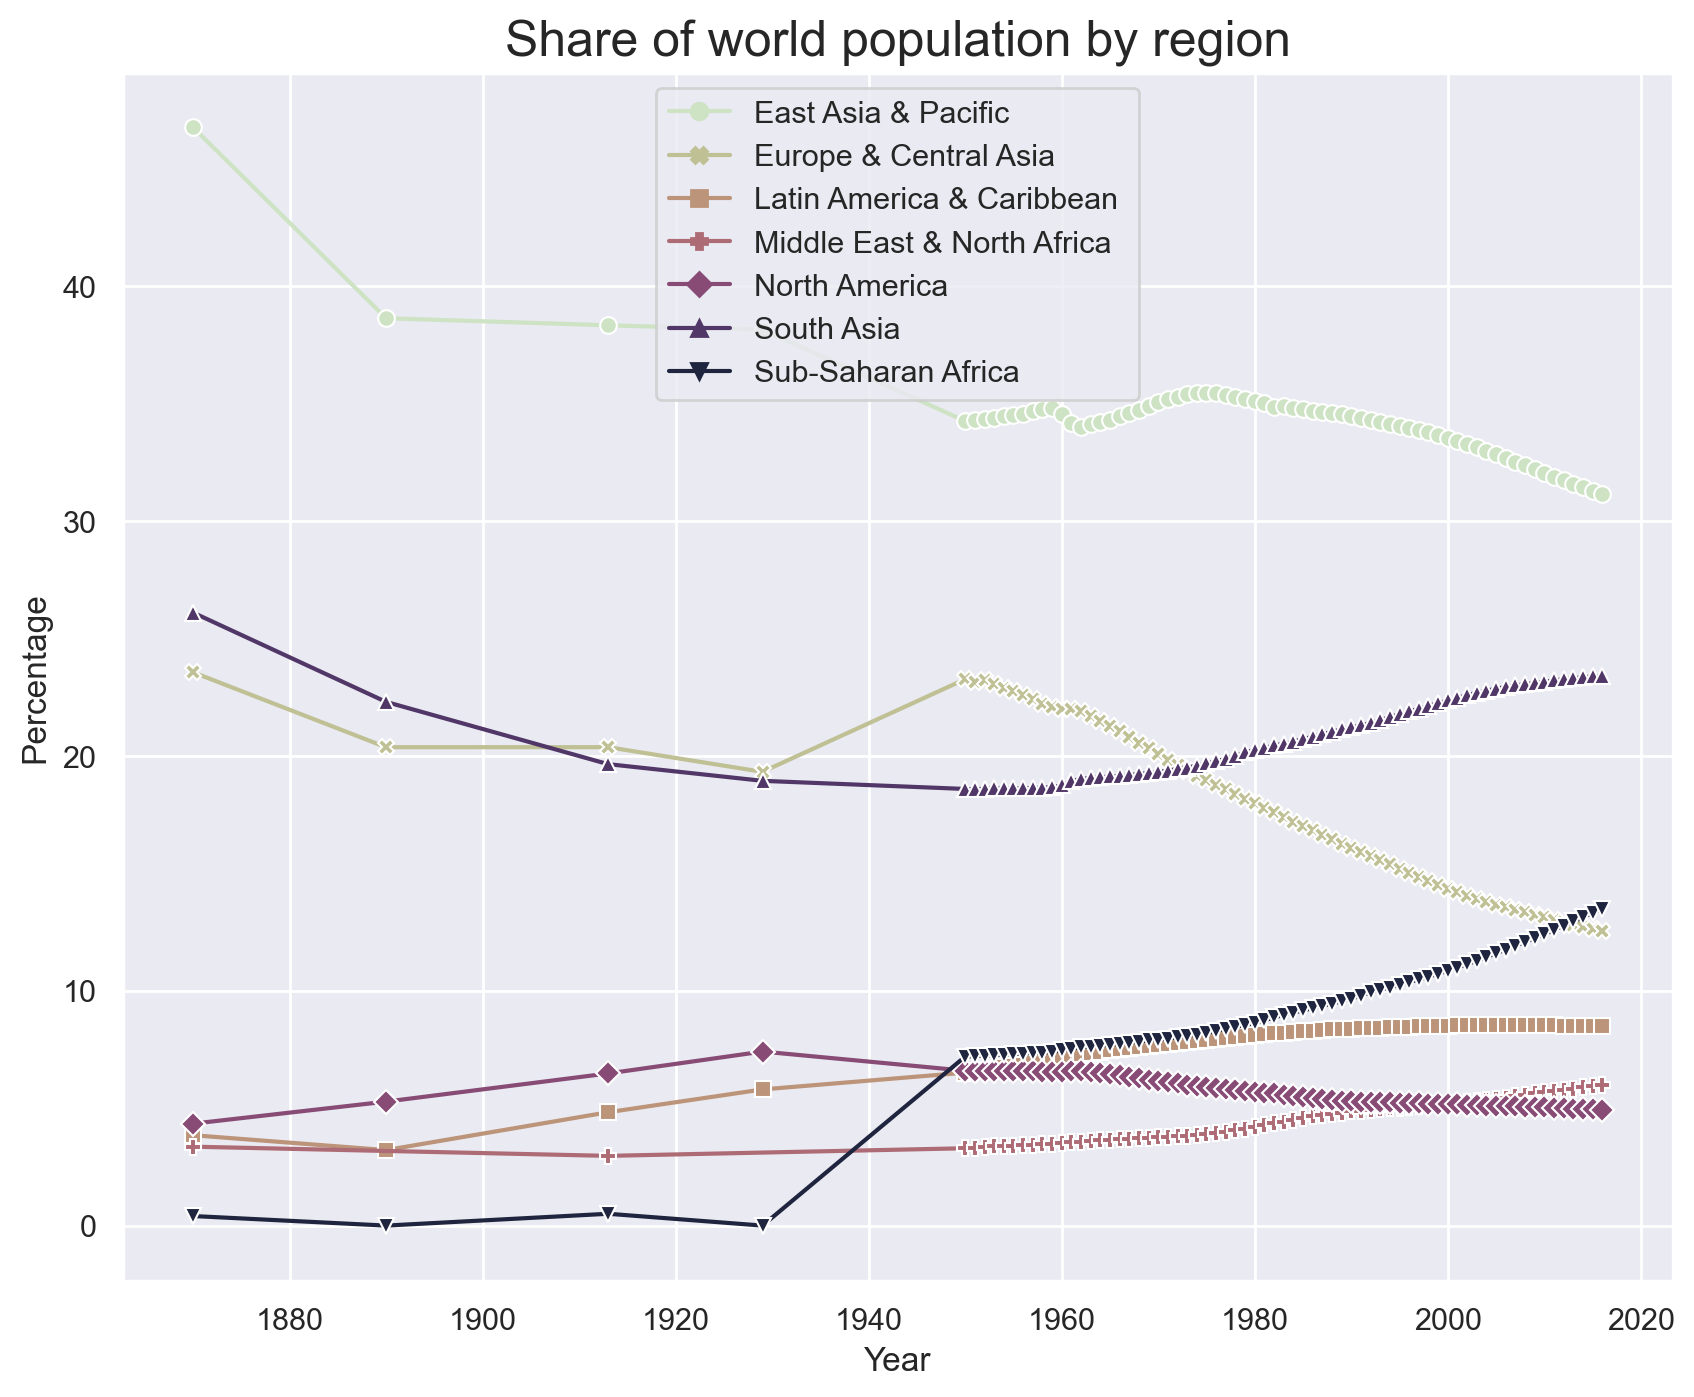

In [43]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=popregion2 , alpha=1, style="choice",
                  palette="ch:2.5,.90", dashes=False, markers=True)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title("Share of world population by region", fontsize=18)

### 3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.

In [44]:
world2= wb.get_series('SP.DYN.CDRT.IN',id_or_value='id', simplify_index=True)
world2 = world2.to_frame()
world2=world2.reset_index()
world2 = world2.drop(['Year','Country'],axis=1)


In [45]:
world1= wb.get_series('SP.DYN.TFRT.IN',id_or_value='id', simplify_index=True)

world1 = world1.to_frame()
world1=world1.reset_index()

In [46]:
world3= wb.get_series('SP.DYN.LE00.IN',id_or_value='id', simplify_index=True)
world3 = world3.to_frame()
world3=world3.reset_index()
world3 = world3.drop(['Year','Country'],axis=1)


In [47]:
world1['SP.DYN.LE00.IN'] = world3
world1['SP.DYN.CDRT.IN'] = world2

In [48]:
world1['Year']=pd.to_numeric(world1.Year)
world1 = world1

In [49]:
world1.rename(columns={'SP.DYN.TFRT.IN':'fertility'}, inplace=True)
world1.rename(columns={'SP.DYN.CDRT.IN':'mortality'}, inplace=True)
world1.rename(columns={'SP.DYN.LE00.IN':'lifeex'}, inplace=True)

In [50]:
worldP = world1.loc[world1.Country=='WLD']
worldA = worldP.loc[worldP.Year!=2019]
worldA

,Country,Year,fertility,lifeex,mortality
2760,WLD,1960,4.980164,52.578207,17.714523
2761,WLD,1961,5.002610,53.079382,14.999311
2762,WLD,1962,5.024376,53.496641,13.952690
...,...,...,...,...,...
2816,WLD,2016,2.445576,72.180484,7.544202
2817,WLD,2017,2.428196,72.385296,7.540865
2818,WLD,2018,2.415032,72.560056,7.528492


In [51]:
worldA = worldA.pivot_table(index='Year',columns='Country',aggfunc='sum')

In [52]:
worldA.rename(columns={'SP.DYN.TFRT.IN':'fertility'}, inplace=True)
worldA.rename(columns={'SP.DYN.CDRT.IN':'mortality'}, inplace=True)
worldA.rename(columns={'SP.DYN.LE00.IN':'lifeex'}, inplace=True)
worldA

,fertility,lifeex,mortality
Country,WLD,WLD,WLD
Year,,,
1960,4.980164,52.578207,17.714523
1961,5.002610,53.079382,14.999311
1962,5.024376,53.496641,13.952690
...,...,...,...
2016,2.445576,72.180484,7.544202
2017,2.428196,72.385296,7.540865
2018,2.415032,72.560056,7.528492


Text(0.5, 1.0, 'Fertility, Mortality and Life expectancy')

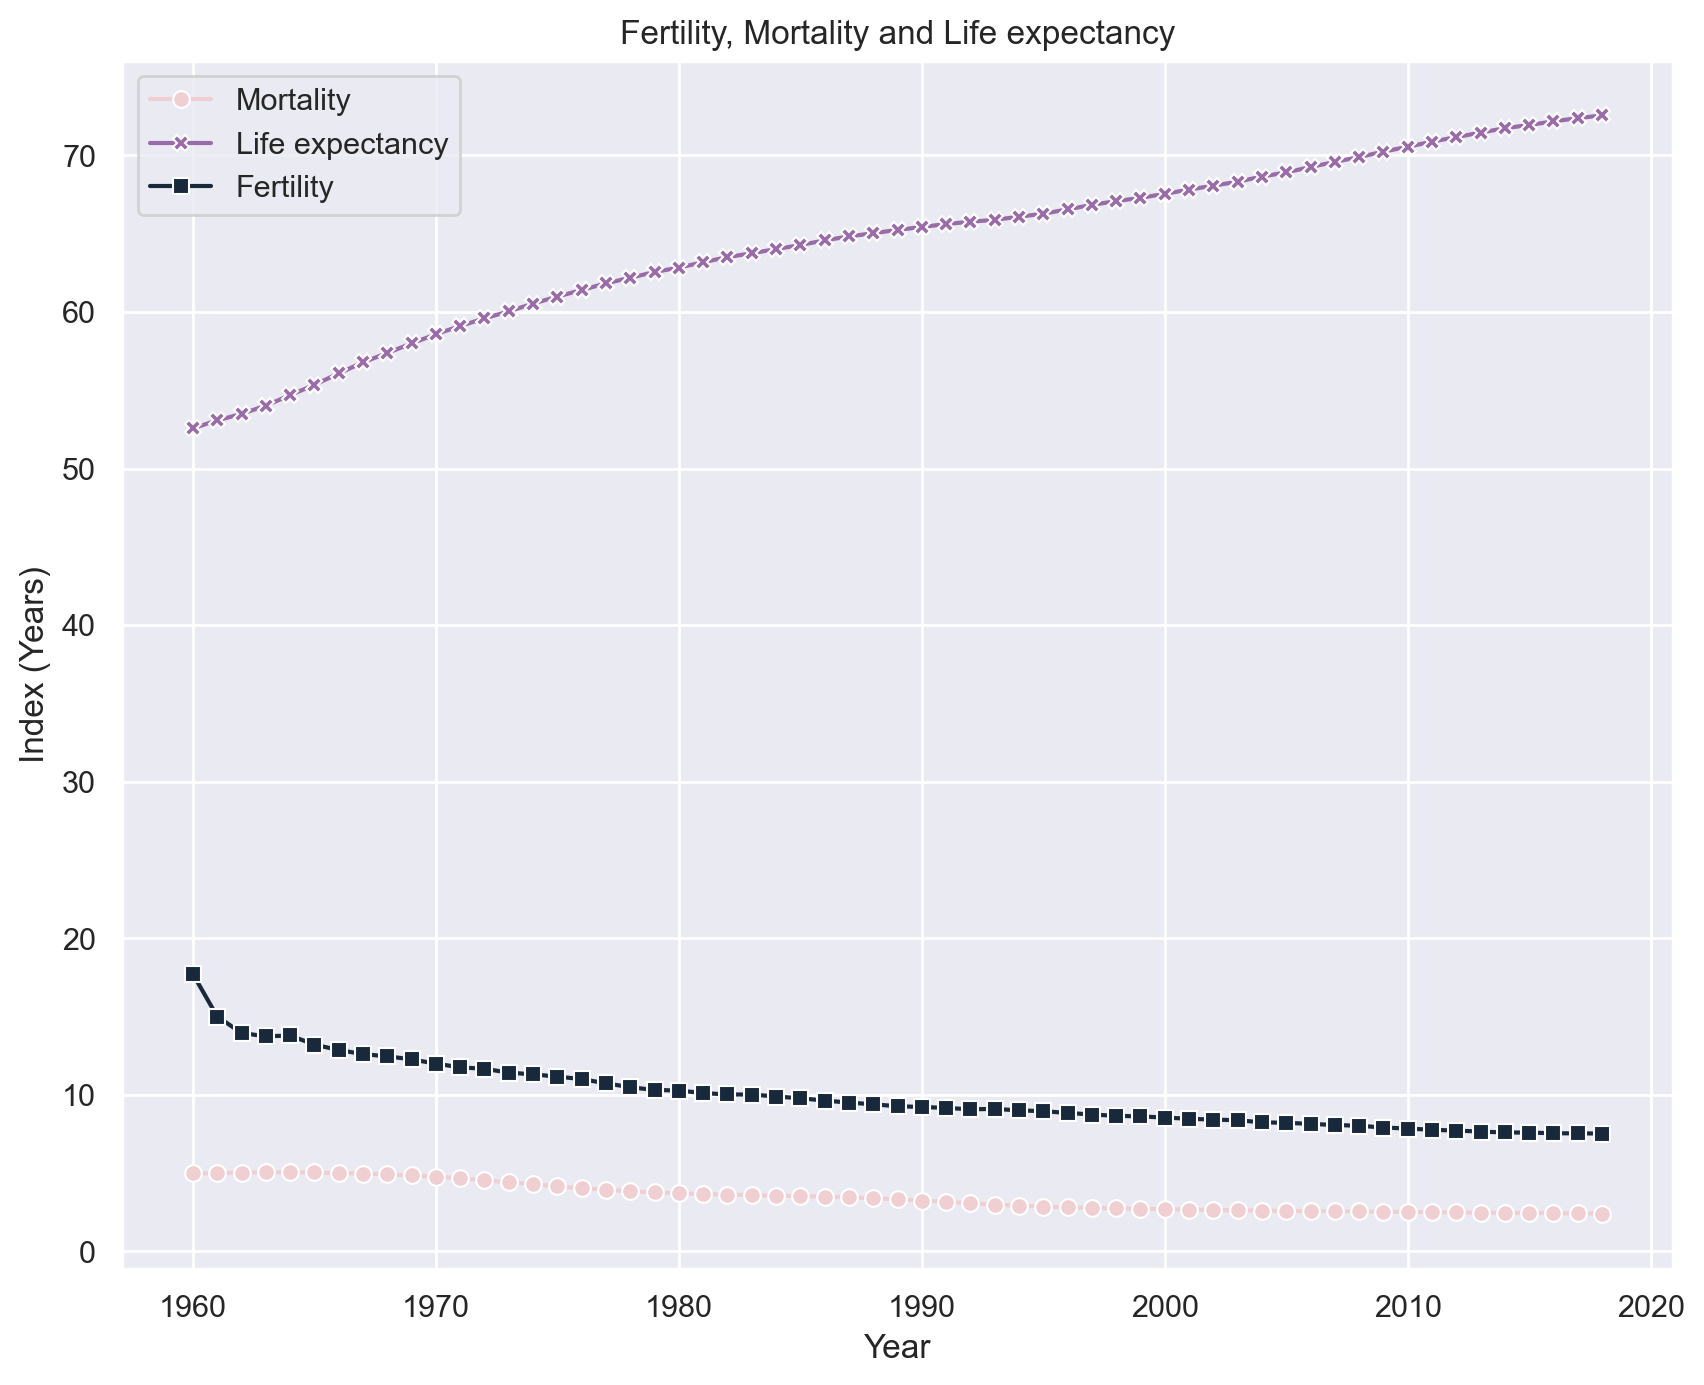

In [92]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=worldA , alpha=1, style='choice',palette="ch:2.5,.55", dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
plt.legend(['Mortality','Life expectancy','Fertility'])
ax.set_xlabel('Year')
ax.set_ylabel('Index (Years)')
ax.set_title("Fertility, Mortality and Life expectancy")


### 4. Downloads mortality and life expectancy data (across regions and cohorts) from the [Human Mortality Database] and plot

In [61]:
mortality = pd.read_csv(pathout + 'stmf.csv')
mortality

/Users/juanestebanrincon/opt/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#HMD STMF pooled file. Last modified: 2020-06-17 22:35:14 
CountryCode Year Week Sex D0_14              D15_64           D65_74             D75_84            D85p             DTotal           R0_14                  R15_64              R65_74              R75_84             R85p               RTotal               Split SplitSex                                           Forecast        
AUT         2000 1    m   7                  183              212                249               163              814              0.000520377479835266   0.00351264205553729 0.0376068457268229  0.0951375307440371 0.231834312697249  0.0109251576286067   0     0                                                         0        
                      f   2                  104              141                338               468              1053             0.000156223010902756   0.00200229785525484 0.0195527451995018  0.0614422751712247 0.224357017520144  0.0132384791578365   0     0                                                         0        
...                                                                                                                                                                                                                                                                                                                          ...        
USA         2020 22   m   151.77076943127898 5765.40937971134 4471.04191585272   5020.51691998012  4990.468229379   22332.2503726363 0.000258153774132254   0.00282672437660941 0.0152866622332658  0.0360921462979277 0.106987419548058  0.007190627382288409 1     1                                                         1        
                      f   116.360020669425   3474.45983018796 3300.2159901441996 4617.61902890563  7546.1379157383  17121.7496273637 0.000206806961681697   0.00170080852101802 0.00987476945238517 0.0260094873212003 0.0912964013963433 0.00535075252011226  1     1                                                         1        
                      b   268.130790100704   9239.8692098993  7771.25790599692   9638.135948885749 12536.6061451173 39454.0          0.00023304397099590298 0.00226332235995523 0.0124005446461531  0.0304389067548227 0.0969569520284572 0.00625695679270201  1     0                                                         1        

[54151 rows x 1 columns]

In [62]:
mortality = mortality.reset_index()
new_header = mortality.iloc[0] 
mortality.columns = new_header 

mortality

,CountryCode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
0,CountryCode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
1,AUT,2000,1,m,7,183,212,249,163,814,0.000520377479835266,0.00351264205553729,0.0376068457268229,0.0951375307440371,0.231834312697249,0.0109251576286067,0,0,0
2,AUT,2000,1,f,2,104,141,338,468,1053,0.000156223010902756,0.00200229785525484,0.0195527451995018,0.0614422751712247,0.224357017520144,0.0132384791578365,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54148,USA,2020,22,m,151.771,5765.41,4471.04,5020.52,4990.47,22332.3,0.000258154,0.00282672,0.0152867,0.0360921,0.106987,0.00719063,1,1,1
54149,USA,2020,22,f,116.36,3474.46,3300.22,4617.62,7546.14,17121.7,0.000206807,0.00170081,0.00987477,0.0260095,0.0912964,0.00535075,1,1,1
54150,USA,2020,22,b,268.131,9239.87,7771.26,9638.14,12536.6,39454,0.000233044,0.00226332,0.0124005,0.0304389,0.096957,0.00625696,1,0,1


In [63]:
mortalityb=mortality.loc[mortality.Sex=='b']
mortalitym=mortality.loc[mortality.Sex=='m']
mortalityf=mortality.loc[mortality.Sex=='f']

In [64]:
graphb = mortalityb[['Year','RTotal']]
graphb = graphb.apply(pd.to_numeric)

graphm = mortalitym[['Year','RTotal']]
graphm = graphm.apply(pd.to_numeric)

graphf = mortalityf[['Year','RTotal']]
graphf = graphf.apply(pd.to_numeric)
graphf

,Year,RTotal
2,2000,0.013238
5,2000,0.013352
8,2000,0.014345
...,...,...
54143,2020,0.007686
54146,2020,0.006795
54149,2020,0.005351


In [65]:
meanb =graphb.groupby(['Year']).mean()
meanf =graphf.groupby(['Year']).mean()
meanm =graphm.groupby(['Year']).mean()

In [66]:
meanb.rename(columns={'RTotal':'Both'}, inplace=True)
meanf.rename(columns={'RTotal':'Female'}, inplace=True)
meanm.rename(columns={'RTotal':'Male'}, inplace=True)


In [67]:
TOT=meanb.merge(meanm, on='Year')
TOT=TOT.merge(meanf, on = 'Year')
TOT

,Both,Male,Female
Year,,,
1990,0.010013,0.010312,0.009731
1991,0.009802,0.010071,0.009548
1992,0.009816,0.010082,0.009565
...,...,...,...
2018,0.009927,0.010184,0.009686
2019,0.009813,0.010086,0.009555
2020,0.010901,0.011184,0.010633


Text(0, 0.5, 'Death rate')

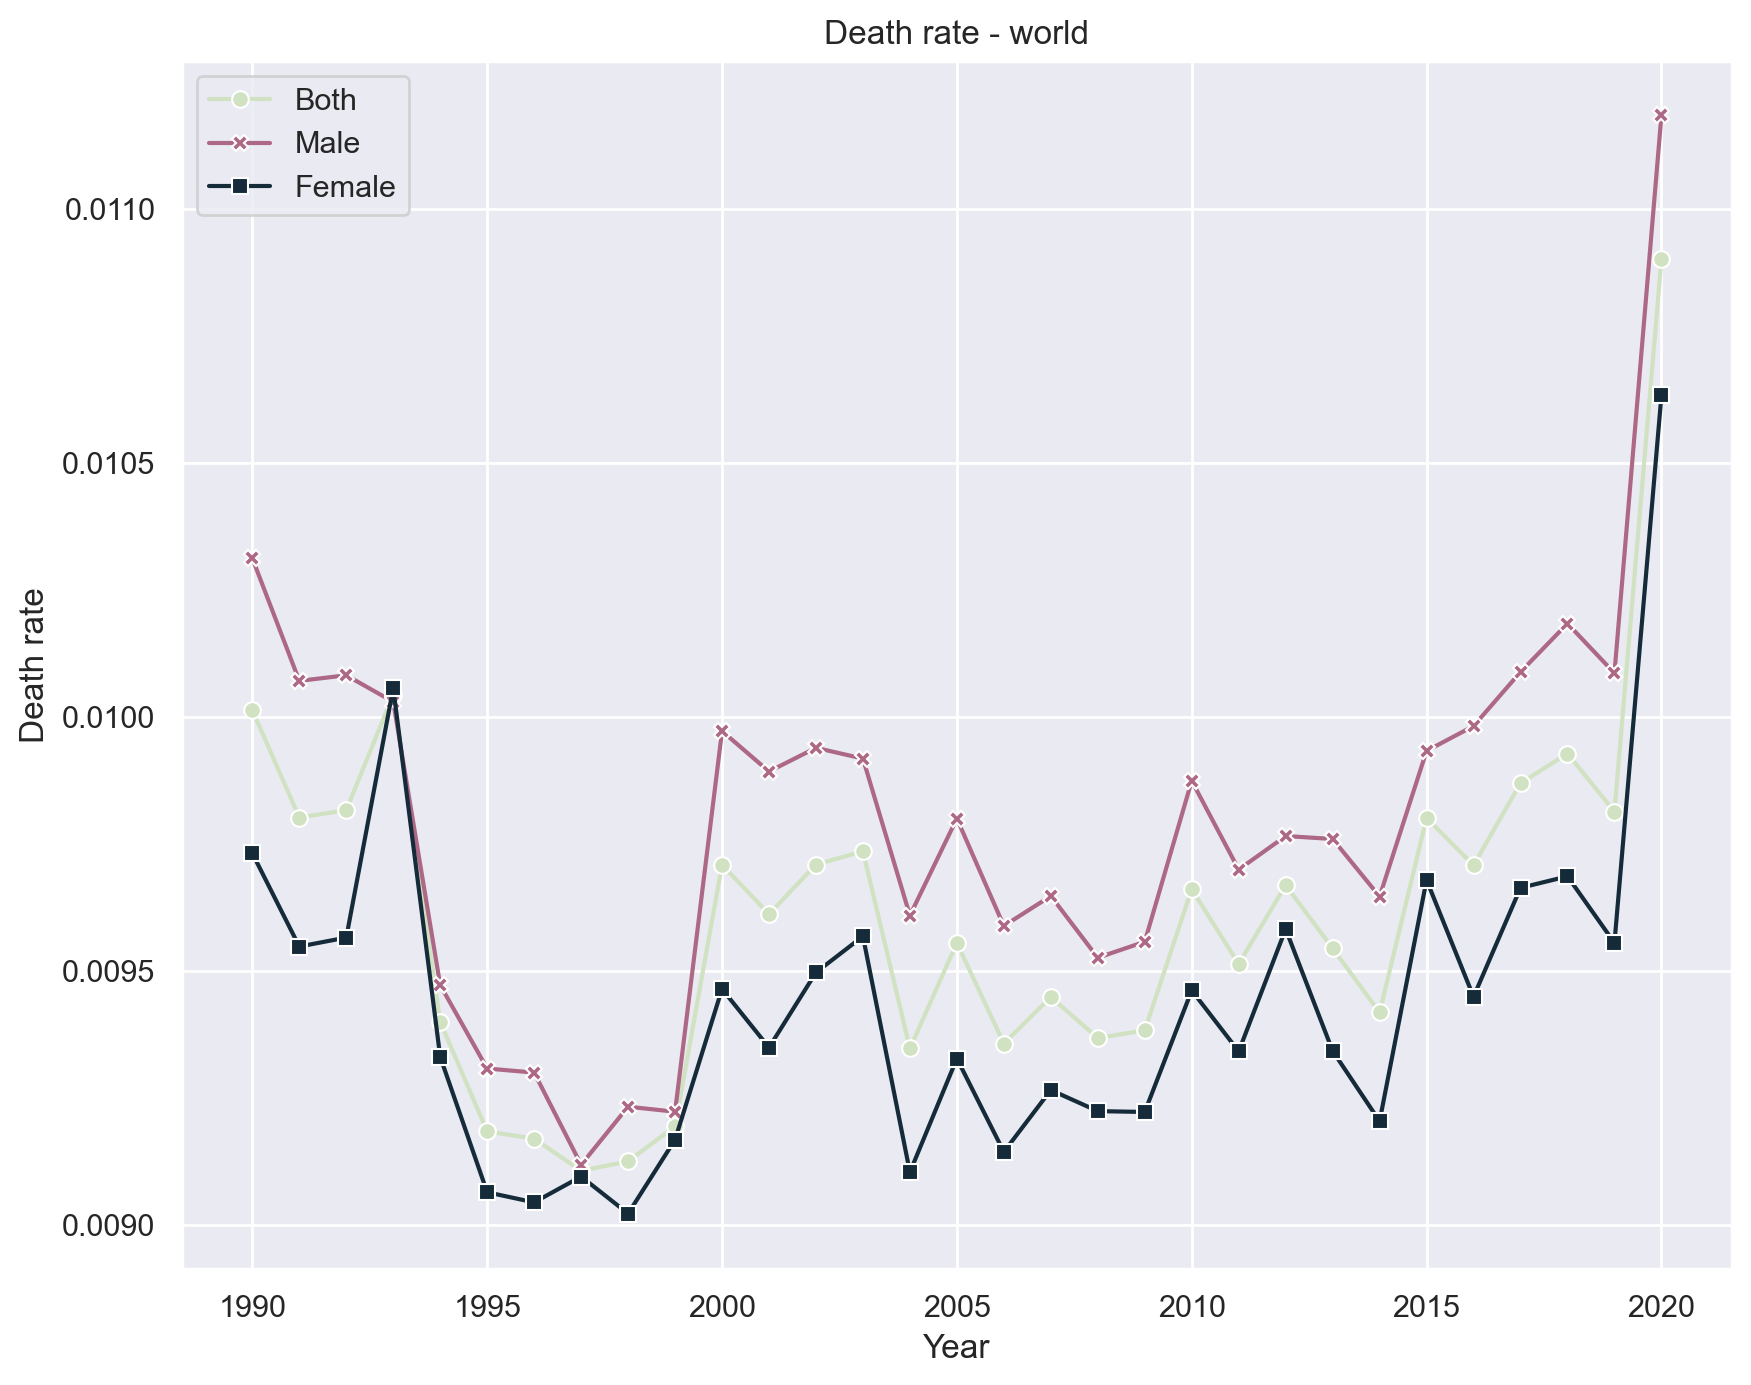

In [93]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=TOT , alpha=1, style='choice',palette="ch:2.2,.99", dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')

plt.title('Death rate - world')
plt.legend(['Both','Male','Female'])

plt.xlabel('Year')
plt.ylabel('Death rate')

In [77]:
mortality.rename(columns={'CountryCode':'countrycode'}, inplace=True)
mortality

,countrycode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
0,CountryCode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
1,AUT,2000,1,m,7,183,212,249,163,814,0.000520377479835266,0.00351264205553729,0.0376068457268229,0.0951375307440371,0.231834312697249,0.0109251576286067,0,0,0
2,AUT,2000,1,f,2,104,141,338,468,1053,0.000156223010902756,0.00200229785525484,0.0195527451995018,0.0614422751712247,0.224357017520144,0.0132384791578365,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54148,USA,2020,22,m,151.771,5765.41,4471.04,5020.52,4990.47,22332.3,0.000258154,0.00282672,0.0152867,0.0360921,0.106987,0.00719063,1,1,1
54149,USA,2020,22,f,116.36,3474.46,3300.22,4617.62,7546.14,17121.7,0.000206807,0.00170081,0.00987477,0.0260095,0.0912964,0.00535075,1,1,1
54150,USA,2020,22,b,268.131,9239.87,7771.26,9638.14,12536.6,39454,0.000233044,0.00226332,0.0124005,0.0304389,0.096957,0.00625696,1,0,1


In [78]:
mortalitycohort = mortality[['countrycode', 'Year','Sex', 'R0_14', 'R15_64', 'R65_74', 'R75_84'
                             , 'R85p']].merge(wbcountries[['countrycode', 'region']], on=['countrycode'])
mortalitycohort

,countrycode,Year,Sex,R0_14,R15_64,R65_74,R75_84,R85p,region
0,AUT,2000,m,0.000520377479835266,0.00351264205553729,0.0376068457268229,0.0951375307440371,0.231834312697249,Europe & Central Asia
1,AUT,2000,f,0.000156223010902756,0.00200229785525484,0.0195527451995018,0.0614422751712247,0.224357017520144,Europe & Central Asia
2,AUT,2000,b,0.000342805103843661,0.00275861110478271,0.0274739491005247,0.072305225985972,0.226241960476464,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
45474,USA,2020,m,0.000258154,0.00282672,0.0152867,0.0360921,0.106987,North America
45475,USA,2020,f,0.000206807,0.00170081,0.00987477,0.0260095,0.0912964,North America
45476,USA,2020,b,0.000233044,0.00226332,0.0124005,0.0304389,0.096957,North America


In [79]:
mortalitycohort2 = mortalitycohort.loc[mortalitycohort.Sex=='b']
mortalitycohort2

,countrycode,Year,Sex,R0_14,R15_64,R65_74,R75_84,R85p,region
2,AUT,2000,b,0.000342805103843661,0.00275861110478271,0.0274739491005247,0.072305225985972,0.226241960476464,Europe & Central Asia
5,AUT,2000,b,0.00038089455982629,0.00292201315628552,0.0249833928081258,0.0703343850732369,0.249547392221266,Europe & Central Asia
8,AUT,2000,b,0.000495162927774176,0.00328726480082121,0.0269291399115624,0.0705807401873288,0.269984463135939,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
45470,USA,2020,b,0.000381345,0.00333091,0.017655,0.0433368,0.13804,North America
45473,USA,2020,b,0.00033519,0.00298188,0.0155477,0.038164,0.121564,North America
45476,USA,2020,b,0.000233044,0.00226332,0.0124005,0.0304389,0.096957,North America


In [80]:
### USA

In [81]:
mortaily_region1= mortalitycohort2.loc[mortalitycohort2.region=='North America']
mortaily_region1 =mortaily_region1.drop(columns=['countrycode','region','Sex']) 
mortaily_region1

,Year,R0_14,R15_64,R65_74,R75_84,R85p
44321,2013,0.00053924,0.00342611,0.0221515,0.0569101,0.170108
44324,2013,0.000546782,0.00344543,0.0227791,0.0585223,0.174927
44327,2013,0.00052114,0.00333941,0.0222013,0.057038,0.17049
...,...,...,...,...,...,...
45470,2020,0.000381345,0.00333091,0.017655,0.0433368,0.13804
45473,2020,0.00033519,0.00298188,0.0155477,0.038164,0.121564
45476,2020,0.000233044,0.00226332,0.0124005,0.0304389,0.096957


In [82]:
mortaily_region1 = mortaily_region1.pivot_table(index='Year', aggfunc='sum')
mortaily_region1 

,R0_14,R15_64,R65_74,R75_84,R85p
Year,,,,,
2013,0.027706,0.162231,0.935832,2.404271,7.186503
2014,0.027143,0.164258,0.922981,2.355308,6.955860
2015,0.027761,0.167639,0.932849,2.371349,7.116056
...,...,...,...,...,...
2018,0.026224,0.172536,0.925687,2.278367,6.939304
2019,0.025772,0.172176,0.892268,2.201692,6.997841
2020,0.009504,0.077509,0.410880,1.008563,3.212572


Text(0.5, 1.0, 'Mortality rate - North America')

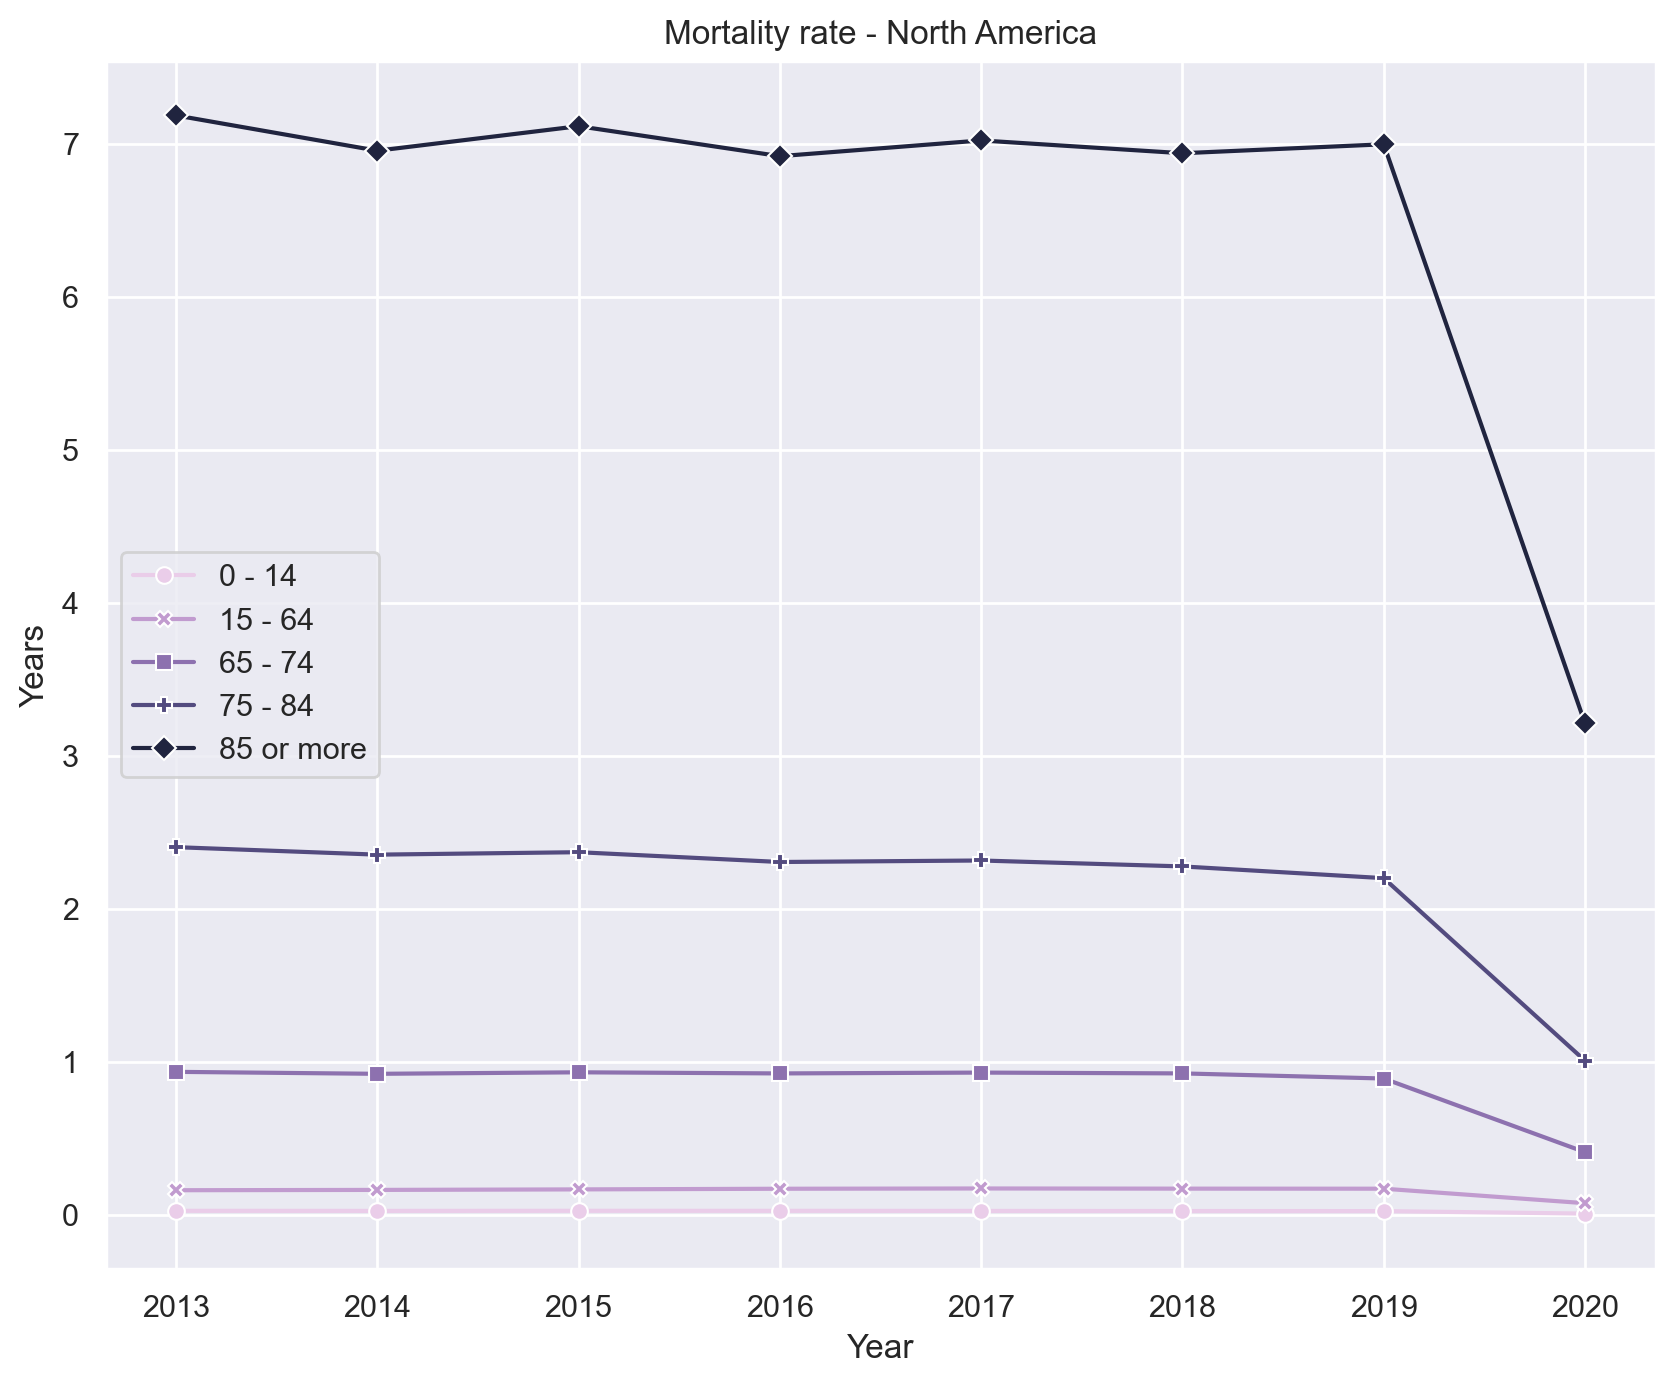

In [94]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=mortaily_region1 , alpha=1, style='choice',palette="ch:2.8,.25", dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
plt.legend(['0 - 14','15 - 64','65 - 74','75 - 84', '85 or more'])
ax.set_xlabel('Year')
ax.set_ylabel('Years')
ax.set_title("Mortality rate - North America")

In [88]:
mortaily_easia = mortalitycohort2.loc[mortalitycohort2.region=='Europe & Central Asia']
mortaily_easia =mortaily_easia.drop(columns=['countrycode','region','Sex']) 
mortaily_easia = mortaily_easia.apply(pd.to_numeric)
mortaily_easia

,Year,R0_14,R15_64,R65_74,R75_84,R85p
2,2000,0.000343,0.002759,0.027474,0.072305,0.226242
5,2000,0.000381,0.002922,0.024983,0.070334,0.249547
8,2000,0.000495,0.003287,0.026929,0.070581,0.269984
...,...,...,...,...,...,...
44312,2020,0.000171,0.001282,0.012551,0.032939,0.146020
44315,2020,0.000285,0.001355,0.010839,0.036262,0.136510
44318,2020,0.000057,0.000229,0.003233,0.012352,0.036654


In [89]:
mortaily_easia = mortaily_easia.pivot_table(index='Year', aggfunc='sum')
mortaily_easia

,R0_14,R15_64,R65_74,R75_84,R85p
Year,,,,,
1990,0.030611,0.187497,1.447023,3.820833,9.751712
1991,0.030566,0.182541,1.376979,3.725699,9.429519
1992,0.027490,0.176532,1.369960,3.748045,9.345923
...,...,...,...,...,...
2018,0.226946,1.905620,13.165823,36.045537,121.401814
2019,0.217778,1.855237,12.962651,34.610146,118.675669
2020,0.079287,0.762156,5.555804,15.193550,53.115731


Text(0.5, 1.0, 'Mortality rate - Europe and Asia')

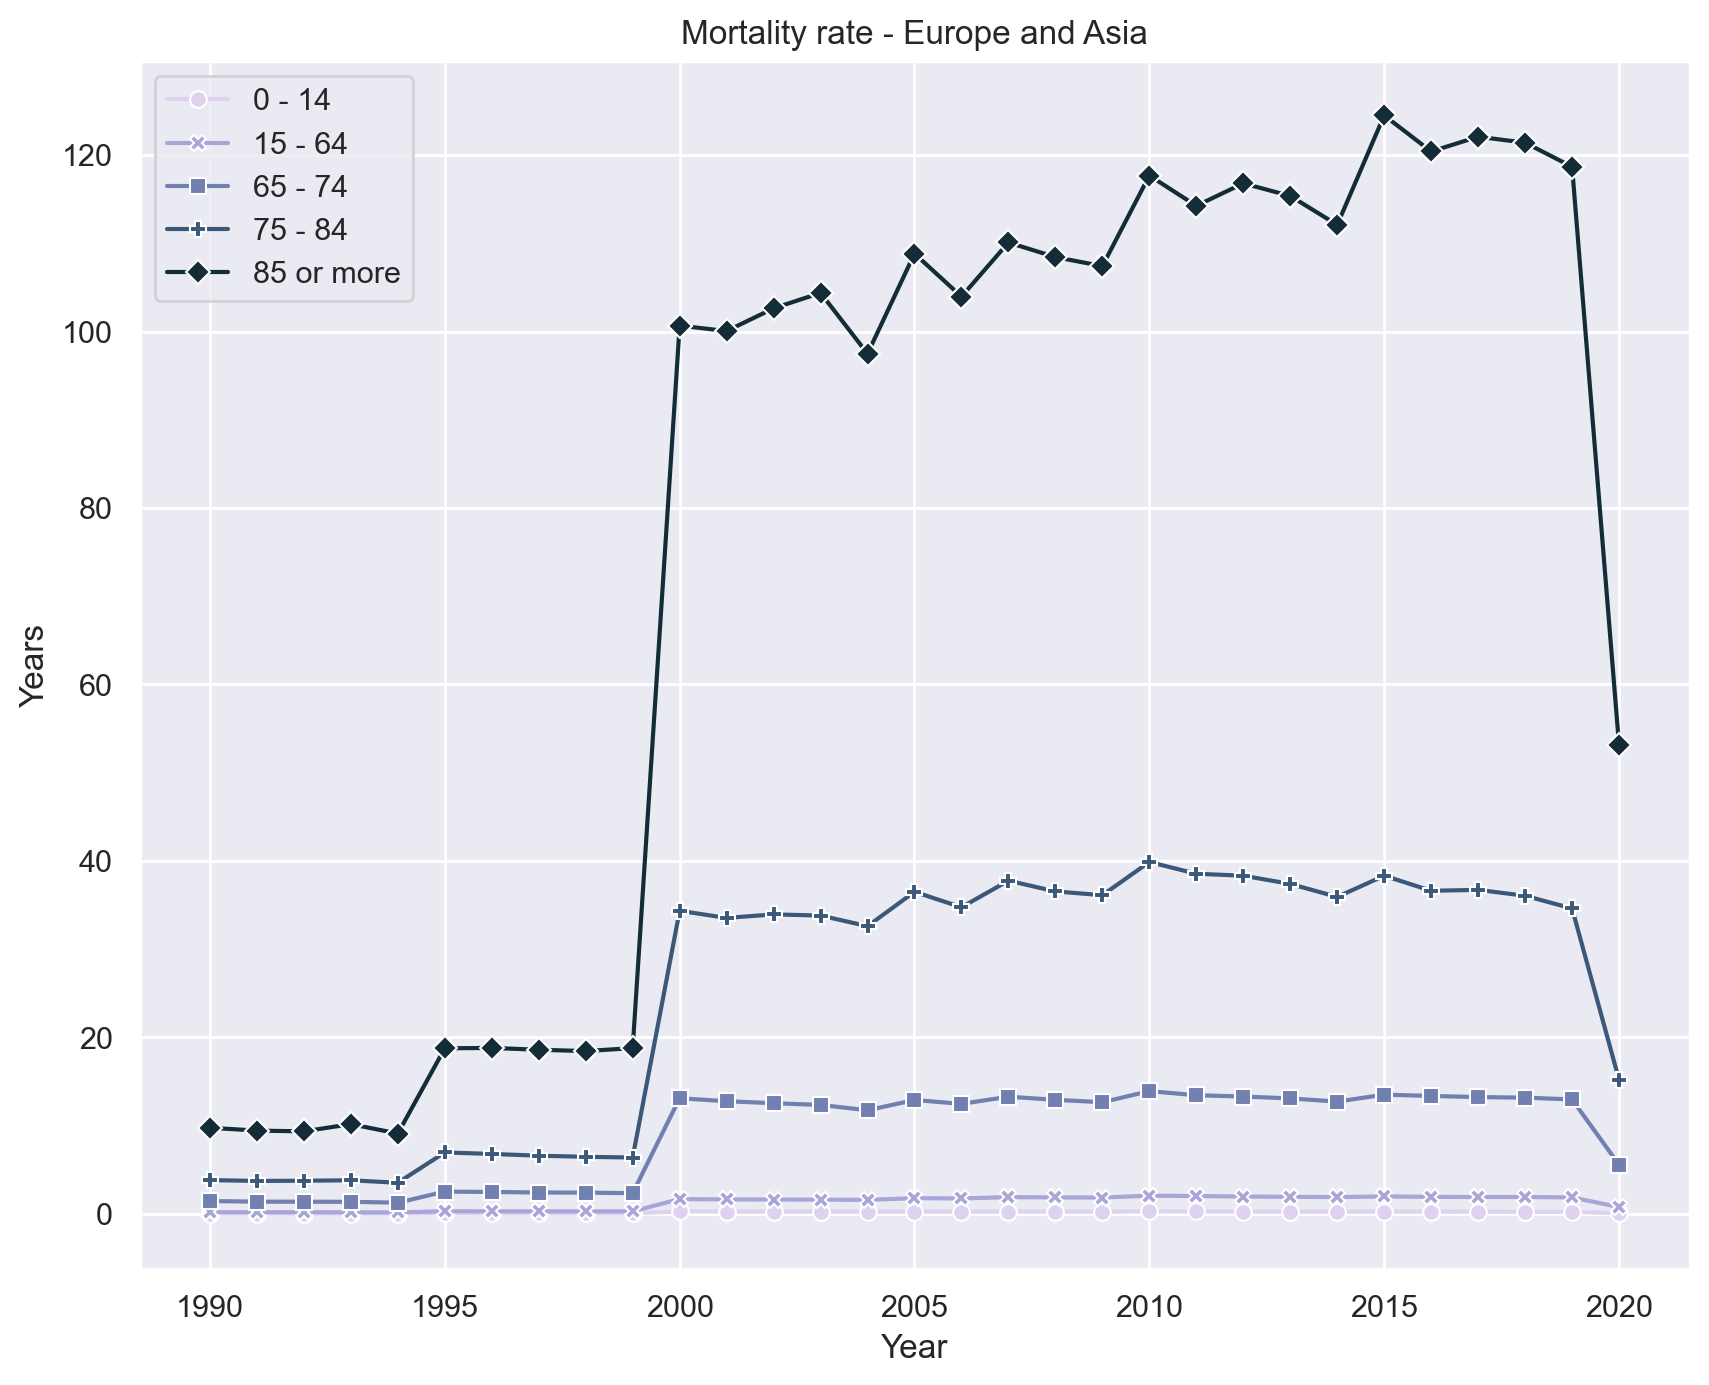

In [97]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=mortaily_easia , alpha=1, style='choice',palette="ch:2.5,.25", dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
plt.legend(['0 - 14','15 - 64','65 - 74','75 - 84', '85 or more'])
ax.set_xlabel('Year')
ax.set_ylabel('Years')
ax.set_title("Mortality rate - Europe and Asia")

### 5. Using this data analyze the convergence of life expectanty, mortality and fertility.

In [98]:
worldp = world1
worldp.rename(columns={'SP.DYN.TFRT.IN':'fertility'}, inplace=True)
worldp.rename(columns={'SP.DYN.CDRT.IN':'mortality'}, inplace=True)
worldp.rename(columns={'SP.DYN.LE00.IN':'lifeex'}, inplace=True)
worldp

,Country,Year,fertility,lifeex,mortality
0,ARB,1960,6.977256,46.546909,20.165357
1,ARB,1961,6.998635,47.141621,19.681097
2,ARB,1962,7.018725,47.731783,19.205420
...,...,...,...,...,...
15837,ZWE,2017,3.707000,60.812000,8.044000
15838,ZWE,2018,3.615000,61.195000,7.883000
15839,ZWE,2019,NaN,NaN,NaN


In [99]:
meanW =worldp.groupby(['Year']).mean()
MEAN = meanW

In [100]:
MEAN.reset_index(level=0, inplace=True)
MEAN

,Year,fertility,lifeex,mortality
0,1960,5.502935,53.384637,16.372385
1,1961,5.486964,53.936576,15.811321
2,1962,5.488079,54.327360,15.446366
...,...,...,...,...
57,2017,2.694446,72.321064,7.635152
58,2018,2.663633,72.505489,7.604203
59,2019,NaN,NaN,NaN


In [101]:
mean1960 = meanW.drop(meanW[meanW.Year != 1960].index)

In [102]:
mean1960.set_index('Year', inplace=True)
mean1960

,fertility,lifeex,mortality
Year,,,
1960,5.502935,53.384637,16.372385


Text(0.5, 1.0, 'Fertility, Mortality and Life expectative - 1960')

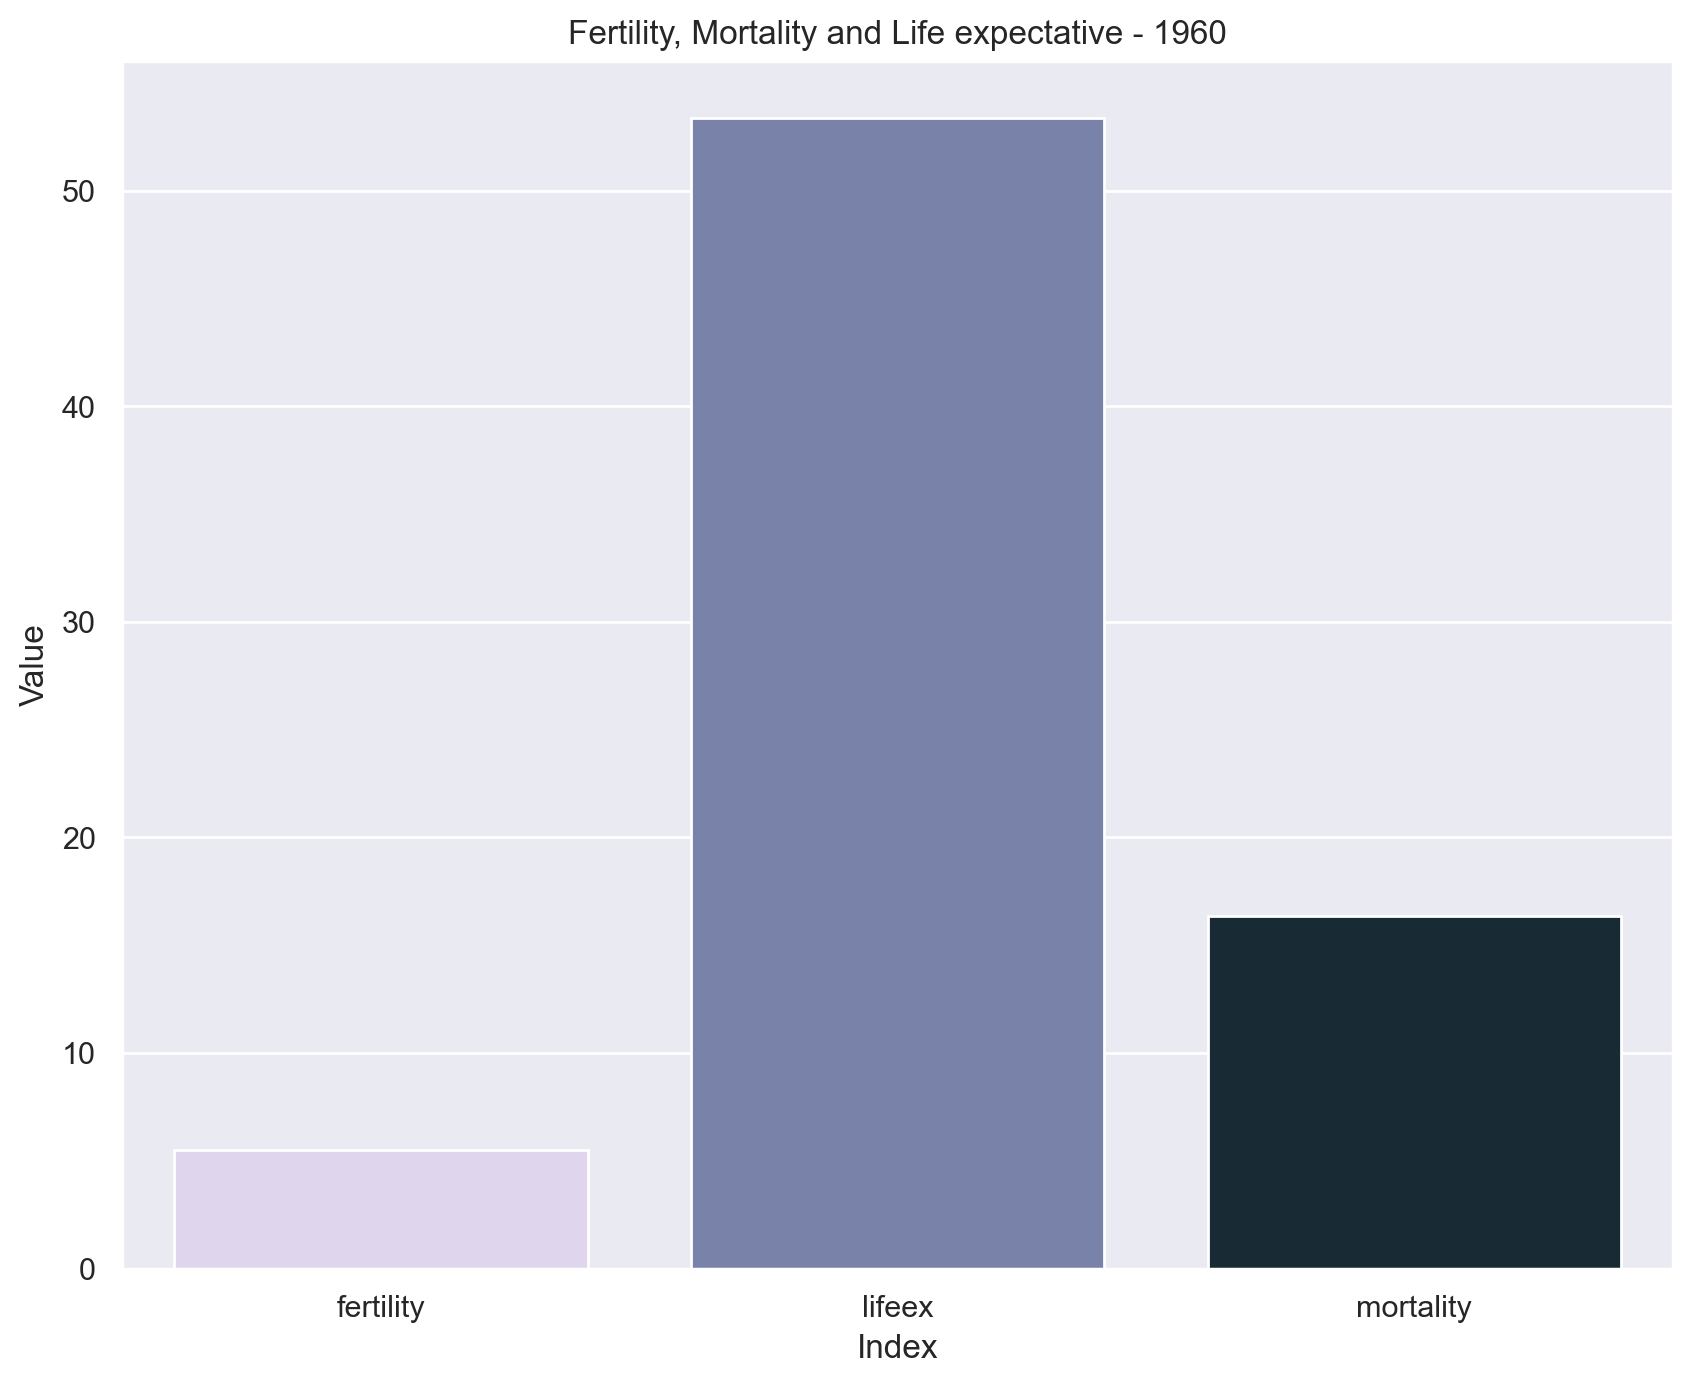

In [103]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.barplot(data=mean1960 , alpha=1,palette="ch:2.5,.25")
plt.style.use('tableau-colorblind10')
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title("Fertility, Mortality and Life expectative - 1960")

In [104]:
mean1970 = meanW.drop(meanW[meanW.Year != 1970].index)
mean1980 = meanW.drop(meanW[meanW.Year != 1980].index)
mean1990 = meanW.drop(meanW[meanW.Year != 1990].index)
mean2000 = meanW.drop(meanW[meanW.Year != 2000].index)
mean2010 = meanW.drop(meanW[meanW.Year != 2010].index)
mean2018 = meanW.drop(meanW[meanW.Year != 2018].index)

In [105]:
mean1970.set_index('Year', inplace=True)
mean1980.set_index('Year', inplace=True)
mean1990.set_index('Year', inplace=True)
mean2000.set_index('Year', inplace=True)
mean2010.set_index('Year', inplace=True)
mean2018.set_index('Year', inplace=True)

Text(0.5, 1.0, 'Fertility, Mortality and Life expectative - 1990')

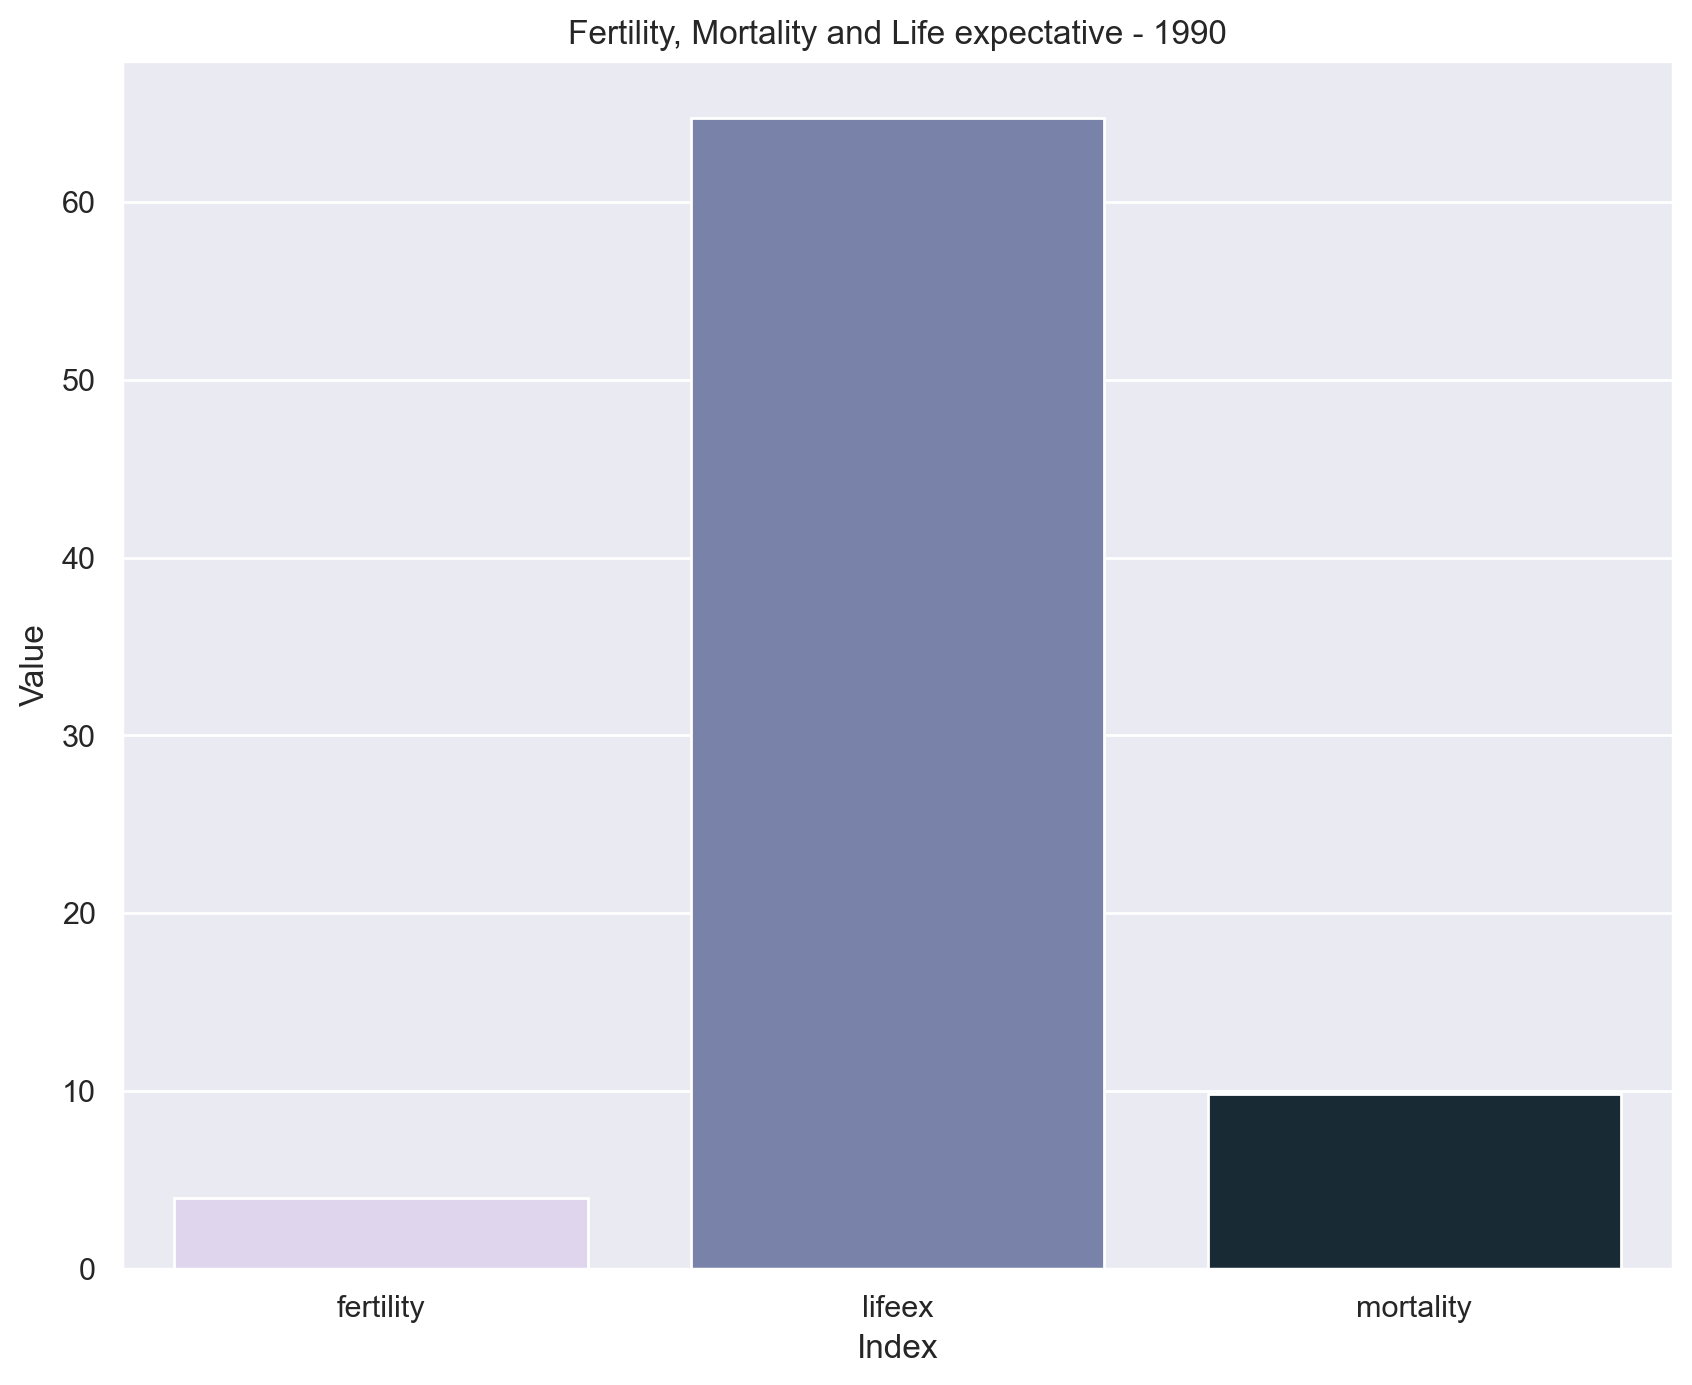

In [106]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.barplot(data=mean1990 , alpha=1,palette="ch:2.5,.25")
plt.style.use('tableau-colorblind10')
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title("Fertility, Mortality and Life expectative - 1990")

Text(0.5, 1.0, 'Fertility, Mortality and Life expectative - 2018')

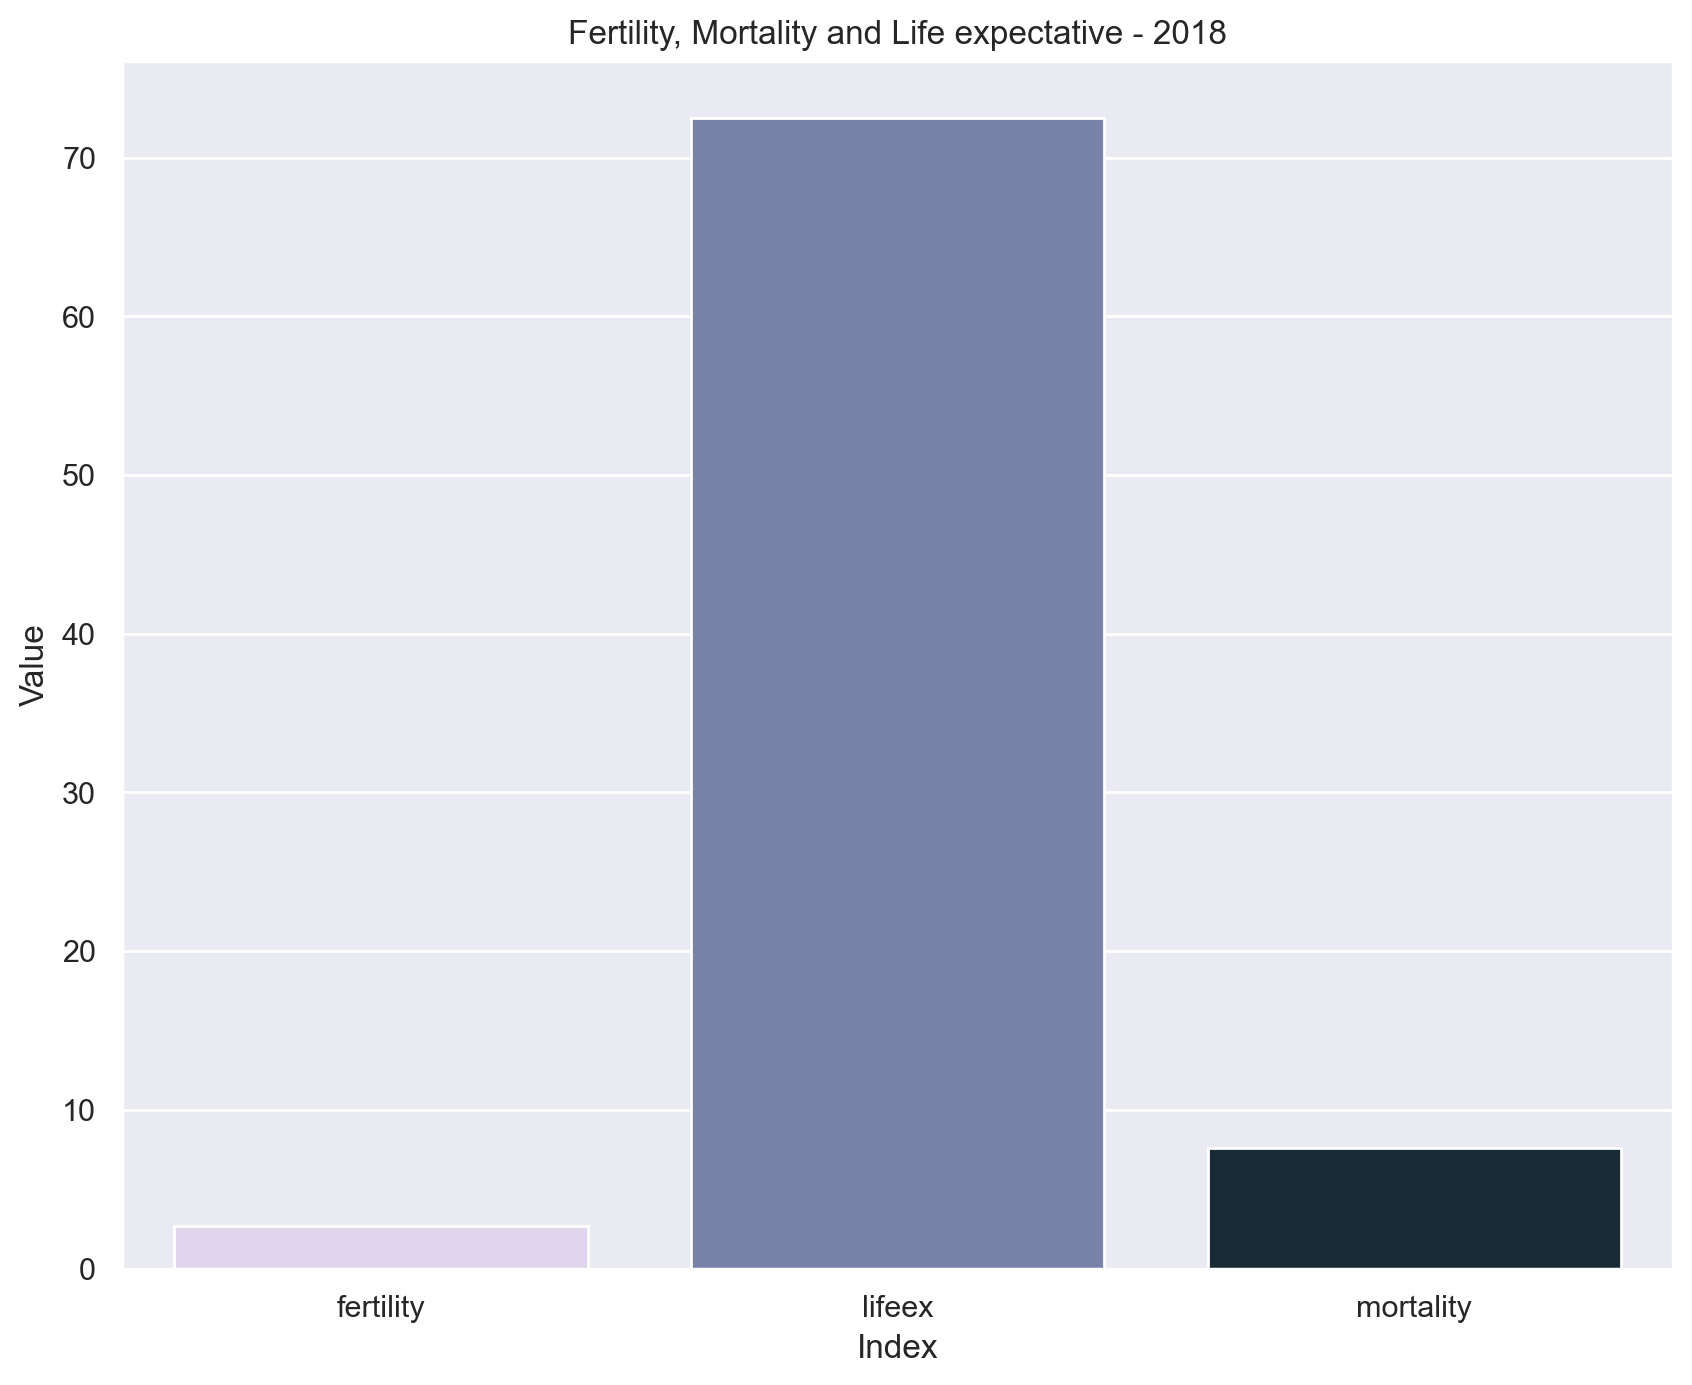

In [107]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.barplot(data=mean2018 , alpha=1,palette="ch:2.5,.25")
plt.style.use('tableau-colorblind10')

ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title("Fertility, Mortality and Life expectative - 2018")

In [ ]:
mean1970.set_index('Year', inplace=True)
mean1980.set_index('Year', inplace=True)
mean1990.set_index('Year', inplace=True)
mean2000.set_index('Year', inplace=True)
mean2010.set_index('Year', inplace=True)
mean2018.set_index('Year', inplace=True)

In [109]:
mean2000

,fertility,lifeex,mortality
Year,,,
2000,3.234917,66.768815,9.133658


In [110]:
frames = [mean1960,mean1970,mean1980,mean1990,mean2000,mean2010,mean2018]

result = pd.concat(frames)
result

,fertility,lifeex,mortality
Year,,,
1960,5.502935,53.384637,16.372385
1970,5.150248,57.802526,13.272785
1980,4.534253,61.618748,11.329837
...,...,...,...
2000,3.234917,66.768815,9.133658
2010,2.905909,70.186157,8.058025
2018,2.663633,72.505489,7.604203


Text(0.5, 1.0, 'Fertility, Mortality and Life expectative')

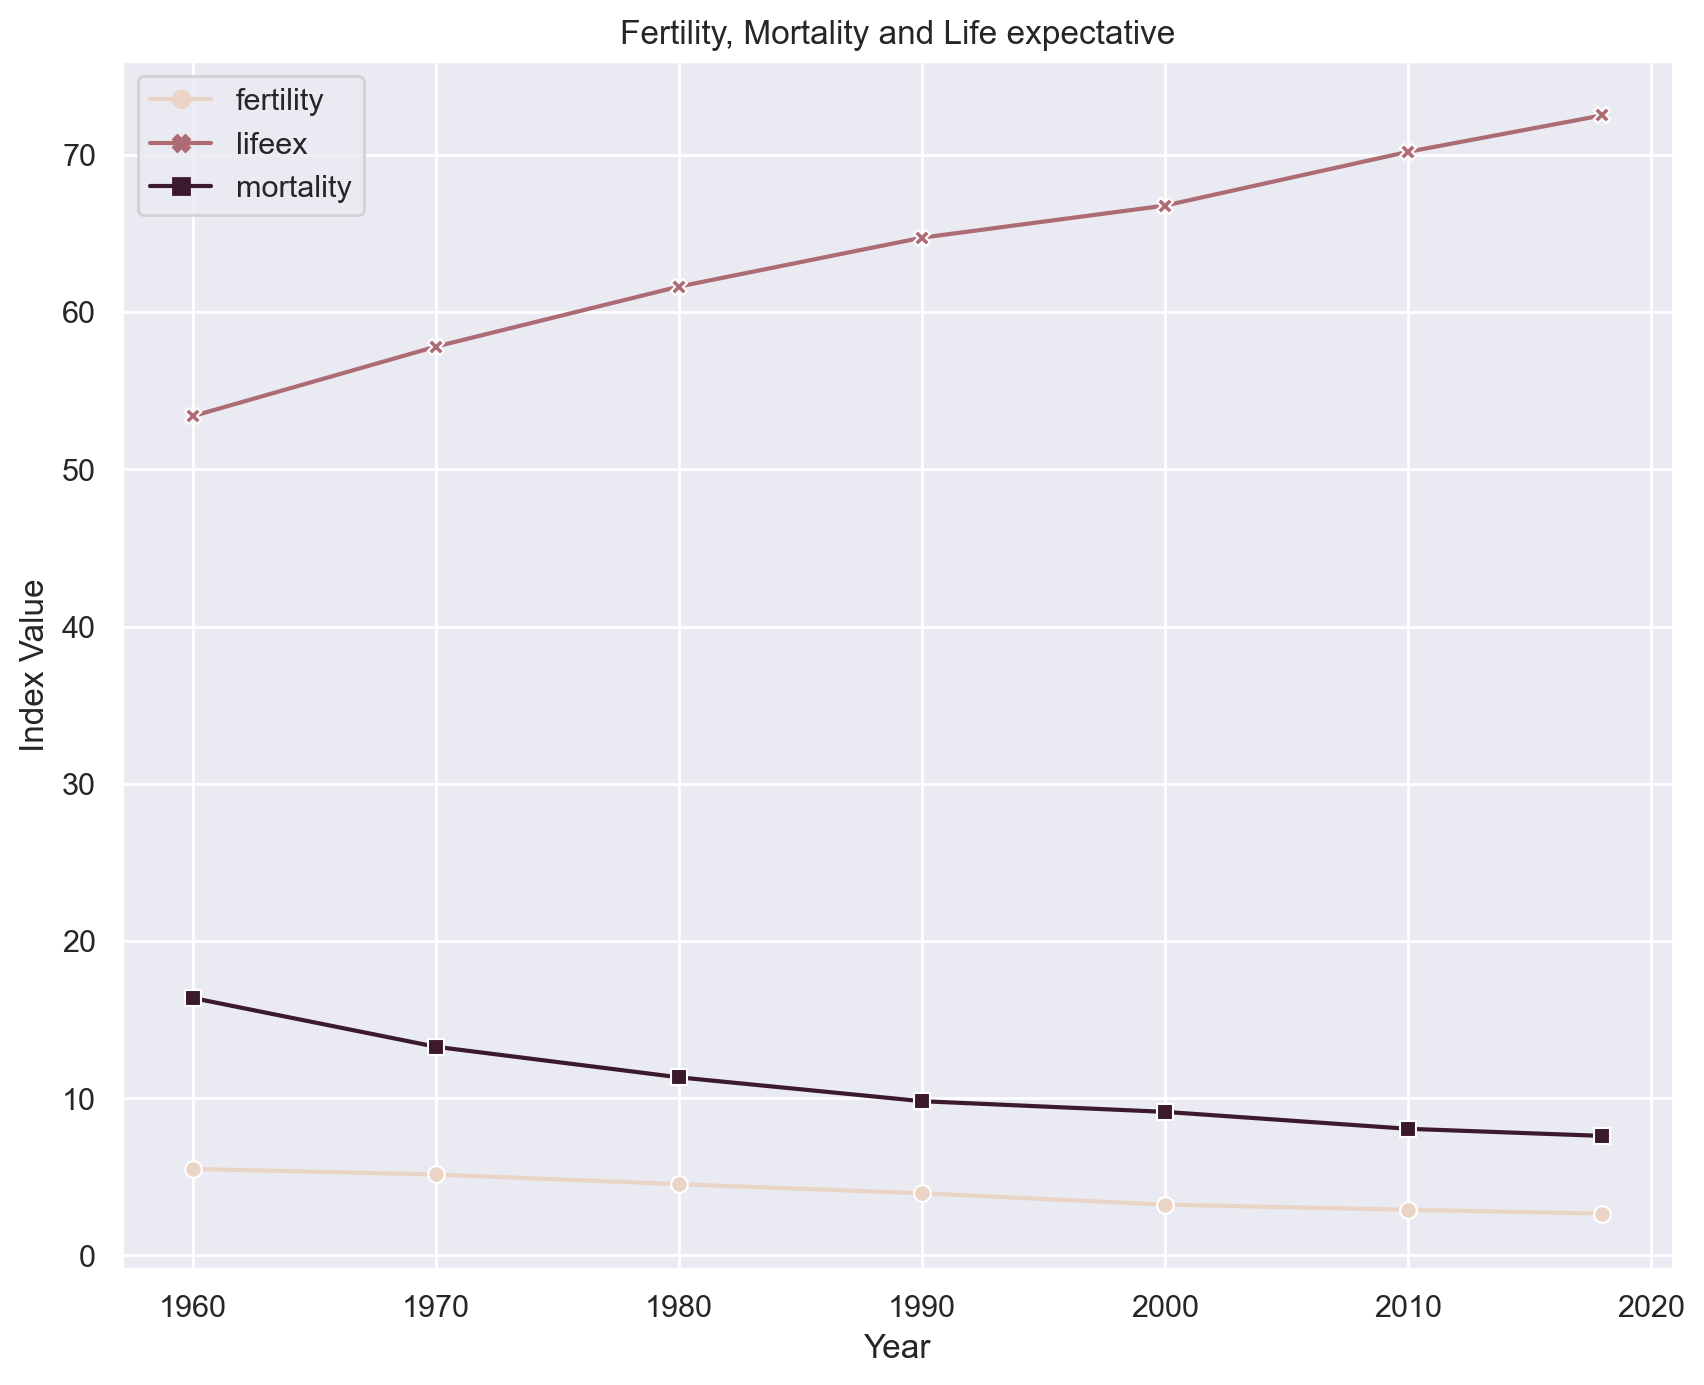

In [126]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)

sns.lineplot(data=result , alpha=1, style='choice',palette="ch:9.5,.25", dashes=False, markers=True)

ax.set_xlabel('Year')
ax.set_ylabel('Index Value')
ax.set_title("Fertility, Mortality and Life expectative")

As we can see in the mean of all countries, fertility and mortality have decreased since 1960 and converged, but life expectancy has increased. In the last figure, we can see how fertility and mortality have a negative tendency and since 1960, the value for these two it's every time more similar. On average, life expectancy has increased for all de countries. We can see a positive tendency since 1960 (and probably earlier).